In [ ]:
from neural_networks_from_scratch.gradient_tracking.gradient_float import GFloat

In [2]:
x = list(range(10))
y_true = [5 * x_ + 10 for x_ in x]


/Users/anton/dev/.virtual_envs/default_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/anton/dev/.virtual_envs/default_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


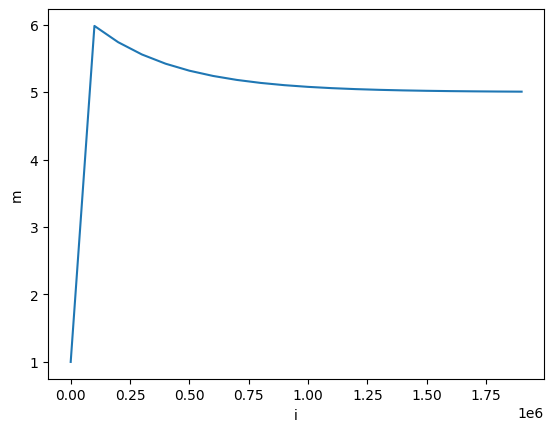

/Users/anton/dev/.virtual_envs/default_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/anton/dev/.virtual_envs/default_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


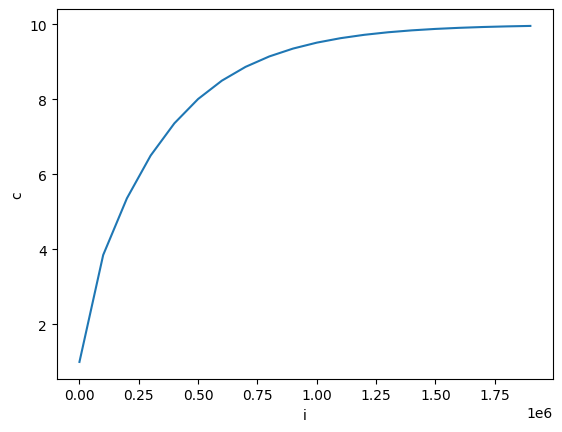

/Users/anton/dev/.virtual_envs/default_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/anton/dev/.virtual_envs/default_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


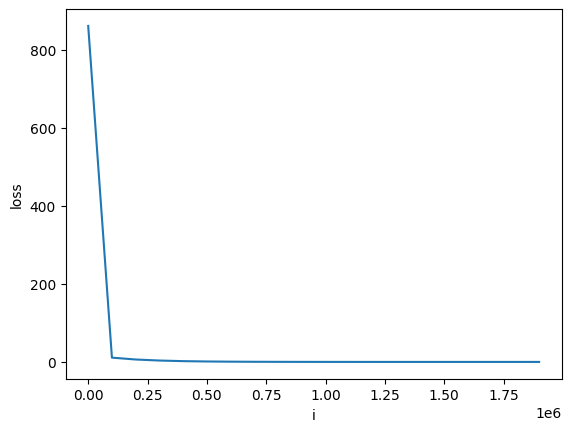

/Users/anton/dev/.virtual_envs/default_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/anton/dev/.virtual_envs/default_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


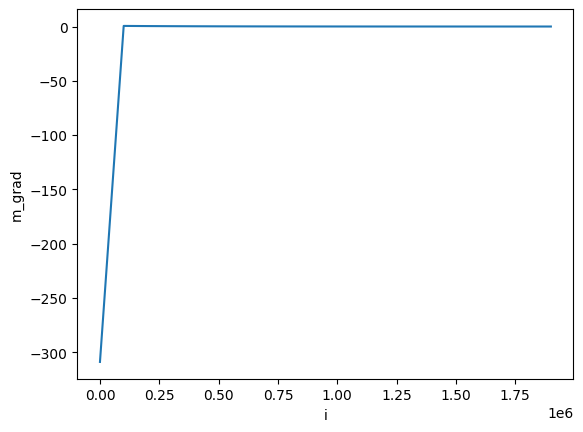

/Users/anton/dev/.virtual_envs/default_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/anton/dev/.virtual_envs/default_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


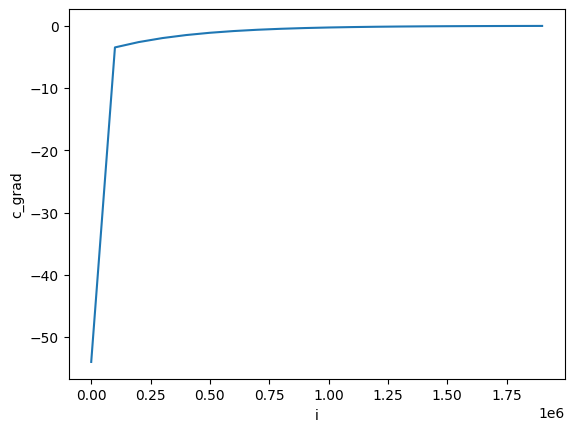

KeyboardInterrupt: 

In [ ]:
from collections import defaultdict
from tqdm.notebook  import tqdm
from IPython.display import clear_output
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

train_steps = int(1e7)
learning_rate = 1e-5

m = GFloat(1.0, name="m")
c = GFloat(1.0, name="c")

def func(x, m, c):
    return [m * x_ + c for x_ in x]


res = defaultdict(list)
for i in tqdm(range(train_steps)):
    if i % (train_steps // 5) == 0:
        learning_rate *= 0.5
    
    y = func(x, m, c)
    loss = sum([(y_ - y_t) ** 2 for y_, y_t in zip(y, y_true)]) / len(x)
    loss.set_is_graph_output()


    if i % (train_steps // 100) == 0:
        print(f"{i=}, {learning_rate=}, {loss.val=}")

        res["i"].append(i)
        res["m"].append(m.val)
        res["c"].append(c.val)
        res["m_grad"].append(m.grad)
        res["c_grad"].append(c.grad)
        res["loss"].append(loss.val)

        clear_output(wait=True)
        plt.clf()

        res_df = pd.DataFrame(res)
        sns.lineplot(data=res_df, x="i", y="m")
        plt.show()
        sns.lineplot(data=res_df, x="i", y="c")
        plt.show()
        sns.lineplot(data=res_df, x="i", y="loss")
        plt.show()
        sns.lineplot(data=res_df, x="i", y="m_grad")
        plt.show()
        sns.lineplot(data=res_df, x="i", y="c_grad")
        plt.show()

    m.update(learning_rate)
    c.update(learning_rate)


In [9]:
m, c

(GFloat(5.00535313952209, is_updateable=True, name=m),
 GFloat(9.966432679093941, is_updateable=True, name=c))

In [ ]:
import numpy as np
y_pred = np.array([float(y_) for y_ in func(x, m, c)])
np.sum(np.abs(y_pred - y_true) / y_true)

0.008254328045004929